# Visualising with Seaborn

## -----------------------------------------------------------------------------------------------------------------

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

## Distribution Plots

Here 'tips' is a built-in dataset

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


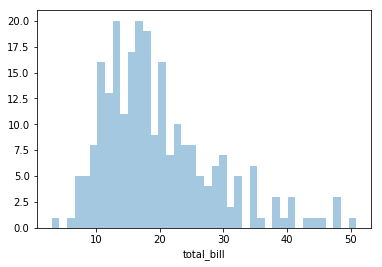

In [13]:
sns.distplot(tips['total_bill'], kde = False, bins = 40)

Here **KDE** refers to **Kernel Density Estimation** which show a kernel line over the histogram.

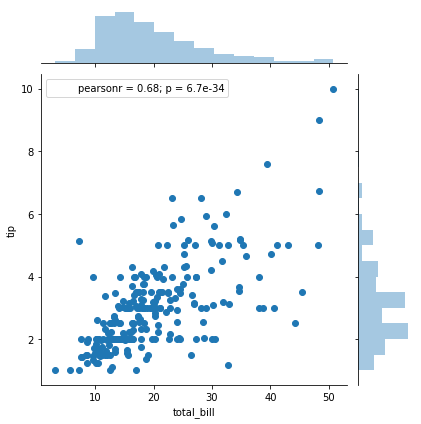

In [16]:
sns.jointplot(x= 'total_bill', y= 'tip', data = tips)

You can play around with different **kind** parameter which is by default **scatter**

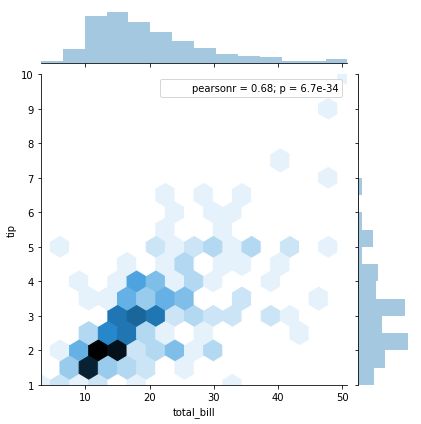

In [17]:
sns.jointplot(x= 'total_bill', y= 'tip', data = tips, kind = 'hex')

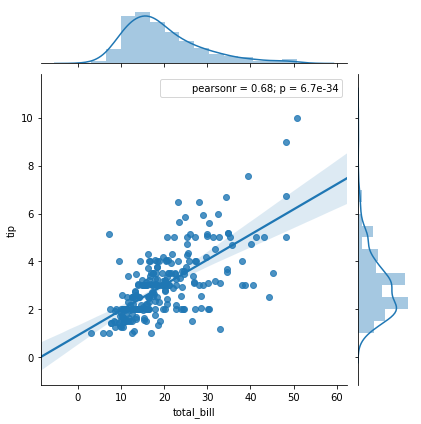

In [18]:
sns.jointplot(x= 'total_bill', y= 'tip', data = tips, kind = 'reg')

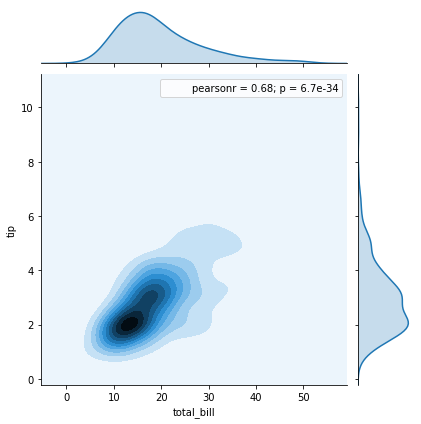

In [19]:
sns.jointplot(x= 'total_bill', y= 'tip', data = tips, kind = 'kde')

On the top right corner we can notice the pearson correlation.

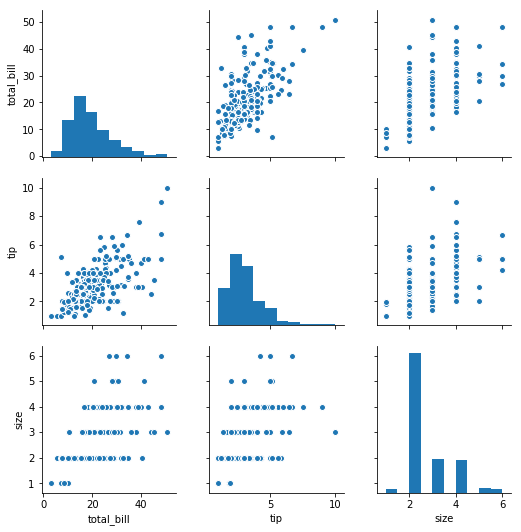

In [44]:
sns.pairplot(tips)

**Pairplot** plots all column variables relative to all other ones in the dataset, except categorical variables.

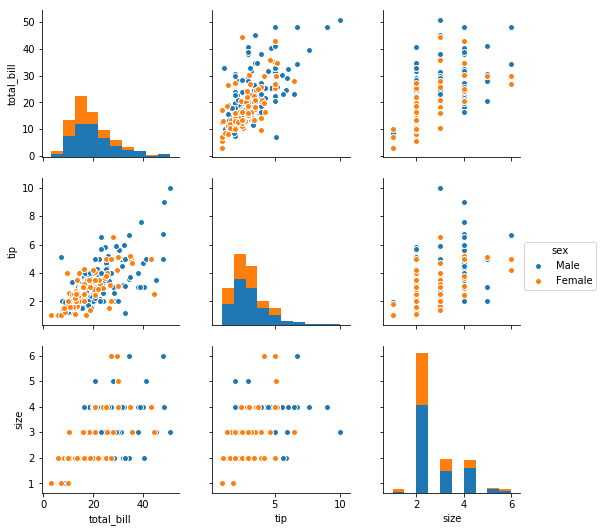

In [36]:
sns.pairplot(tips, hue = 'sex')

**Rug Plot**

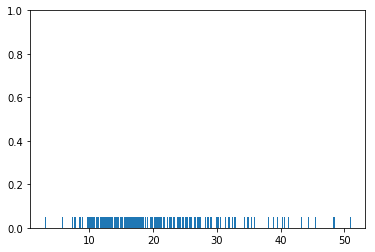

In [41]:
sns.rugplot(tips['total_bill'])

A **rugplot** is the base for modelling a KDE.  
https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png

## -----------------------------------------------------------------------------------------------------------------

## Categorical Plots

### Bar Graph

In [11]:
import numpy as np

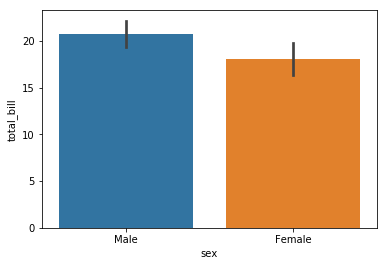

In [15]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.mean)

**estimator** by default has mean as value

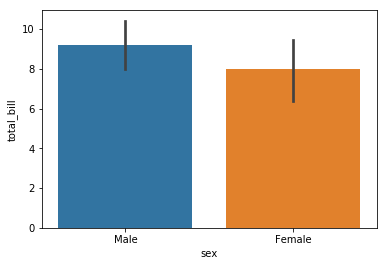

In [14]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

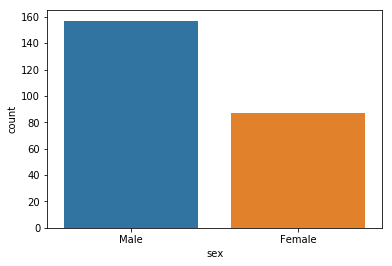

In [17]:
sns.countplot(x= 'sex', data = tips)

### Box Plot

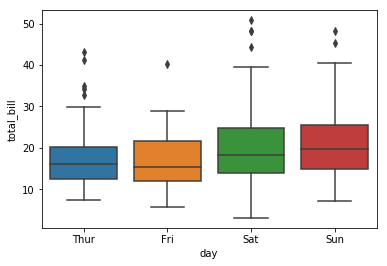

In [19]:
sns.boxplot(x= 'day', y='total_bill', data = tips)

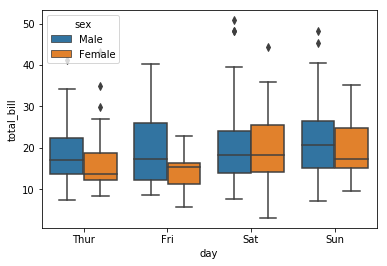

In [20]:
sns.boxplot(x= 'day', y='total_bill', data = tips, hue = 'sex')

### Violin Plot  
https://blog.modeanalytics.com/violin-plot-examples/

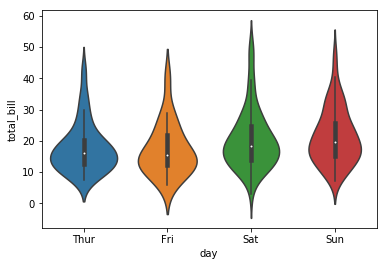

In [57]:
sns.violinplot(x= 'day', y = 'total_bill', data = tips)

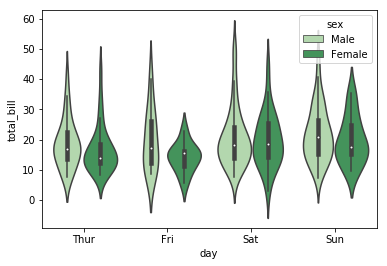

In [58]:
sns.violinplot(x= 'day', y = 'total_bill', data = tips, hue = 'sex', palette = 'Greens')

A **palette** parameter is used to choose the color schemes.

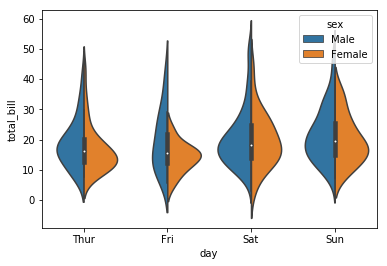

In [28]:
sns.violinplot(x= 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

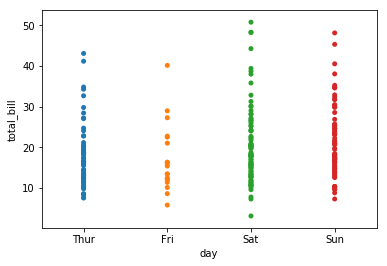

In [32]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips)

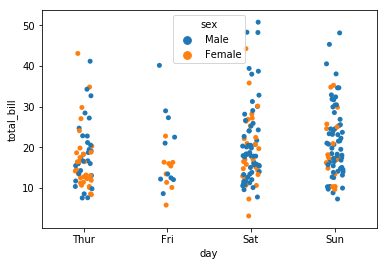

In [42]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex')

** jitter ** parameter adds a random noise to make the stripplot more readable.

### Swarm Plot   
A swarm plot is a combination of violin plot and strip plot.

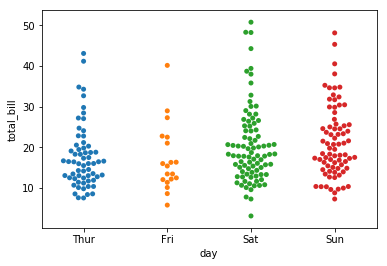

In [59]:
sns.swarmplot(x= 'day', y = 'total_bill', data = tips)

Not advised for larger datasets.

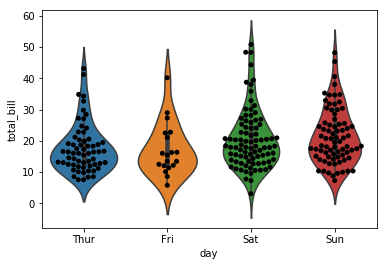

In [63]:
sns.violinplot(x= 'day', y = 'total_bill', data = tips)
sns.swarmplot(x= 'day', y = 'total_bill', data = tips, color = 'black')

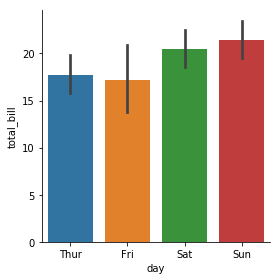

In [66]:
sns.factorplot(x= 'day', y = 'total_bill', data = tips, kind = 'bar')

A ** Factor plot** has a **kind** parameter which can be used in general to visualise any other plot.

## --------------------------------------------------------------------------------------------------------------____ 

### Matrix Plots

In [5]:
flights = sns.load_dataset('flights')

In [6]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [7]:
tip = tips.corr()

In [10]:
tip

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


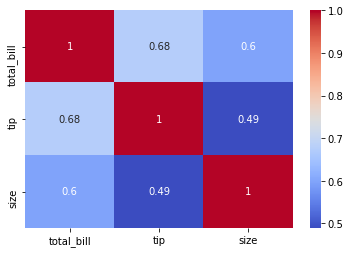

In [21]:
sns.heatmap(tip, annot = True, cmap = 'coolwarm')

Here **annot** allows the values to be written within the boxes.
**cmap** allows the color scheme.

In [13]:
flights.pivot_table(index = 'month', columns = 'year', values=  'passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


we use **pivot table** to convert out dataframe in matrix form.

In [15]:
flights = flights.pivot_table(index = 'month', columns = 'year', values=  'passengers')

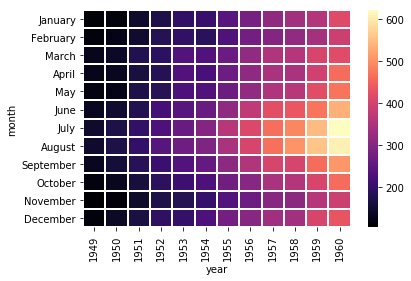

In [25]:
sns.heatmap(flights, cmap = 'magma', linewidths = 1, linecolor = 'white')

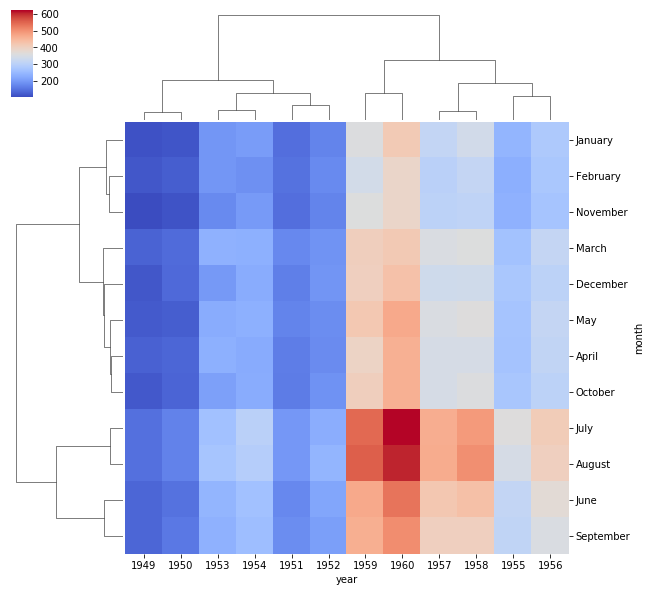

In [27]:
sns.clustermap(flights, cmap = 'coolwarm')

A **ClusterMap** groups together similar rows and columns.

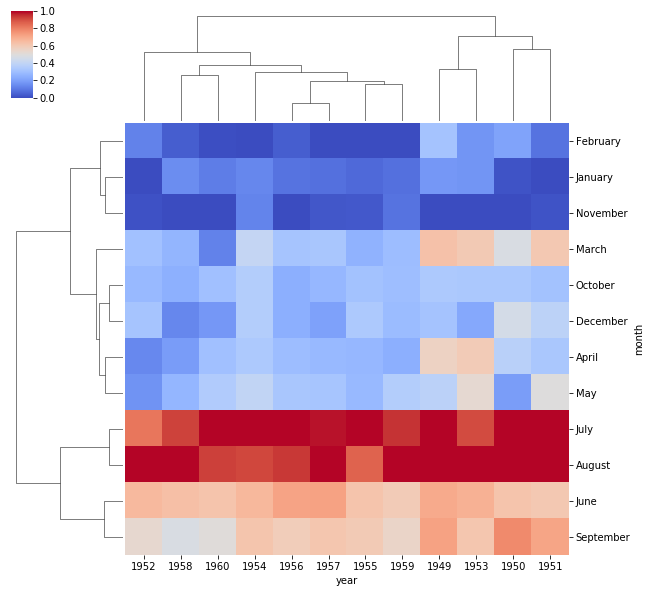

In [28]:
sns.clustermap(flights, cmap = 'coolwarm', standard_scale= 1) 

**Standard Scale** can be used to scale, giving value **1** will normalize.

## Regression Plot

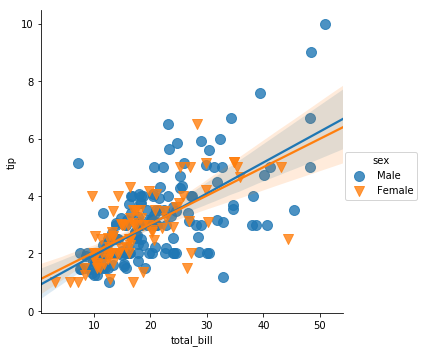

In [41]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'], scatter_kws = {'s': 100} )

Here **scatter_kws** takes in a dictionary with size **s** of the markers specified.

* Rather than separating on the basis of hue we can also separate on the basis of row or column

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


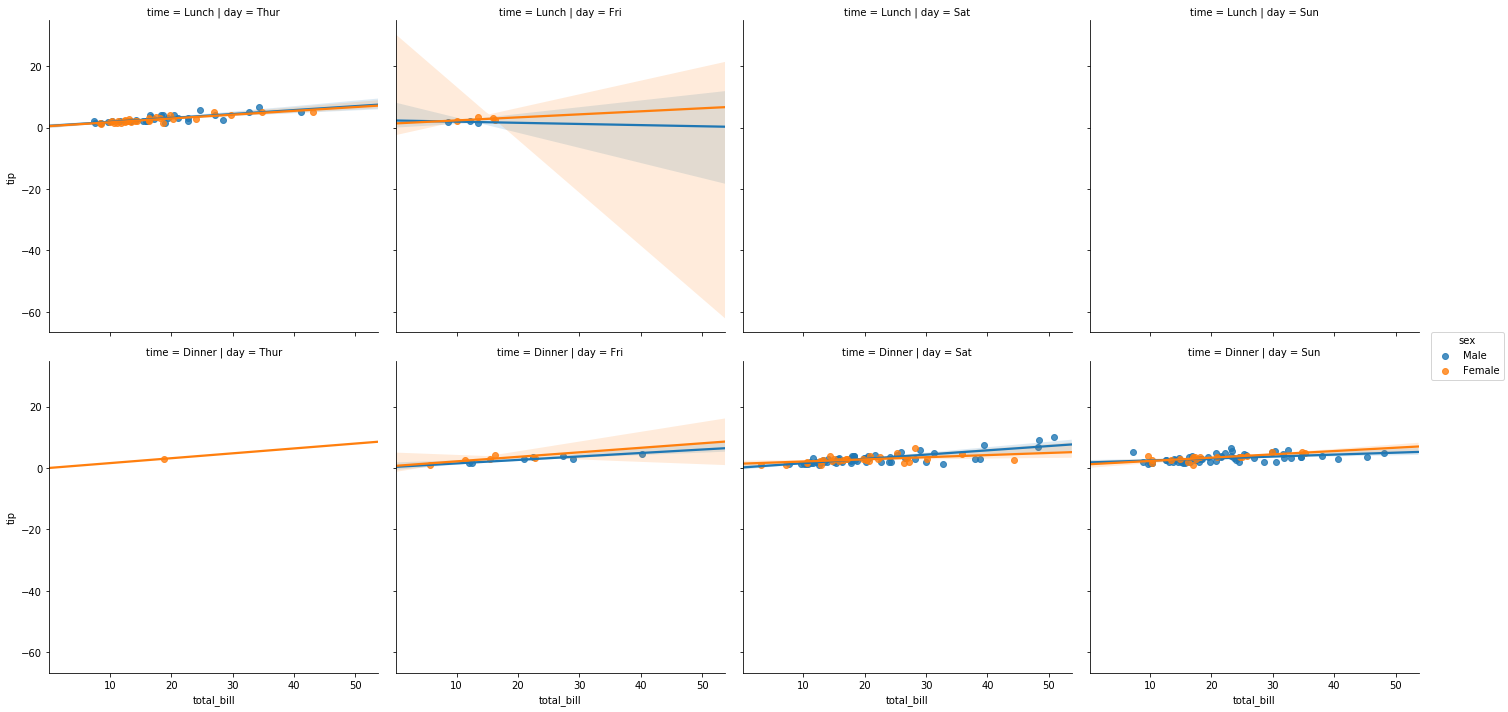

In [45]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', row = 'time', hue = 'sex')

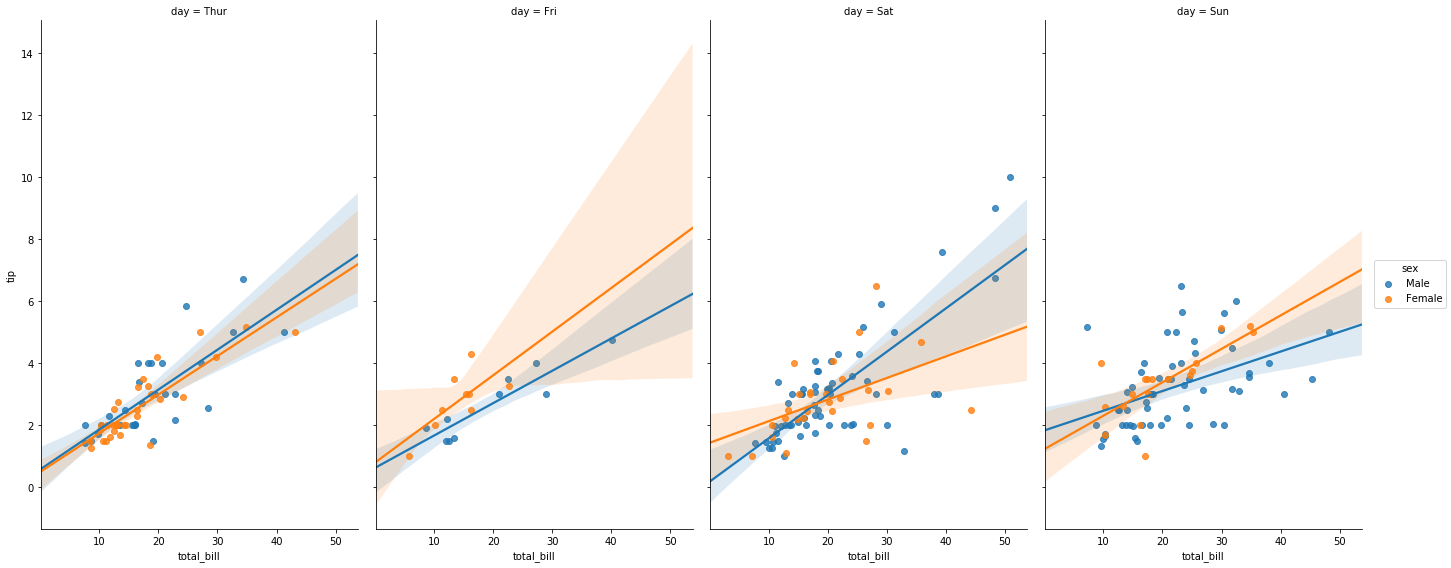

In [47]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day',hue = 'sex', aspect = 0.6, size = 8)

## Grids

In [59]:
iris = sns.load_dataset('iris')

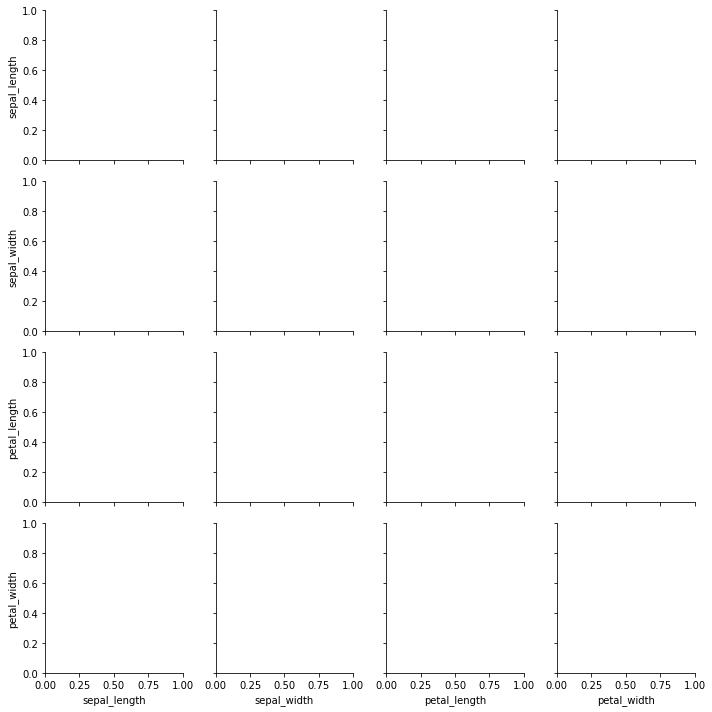

In [66]:
ir = sns.PairGrid(iris)

/home/prashant/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


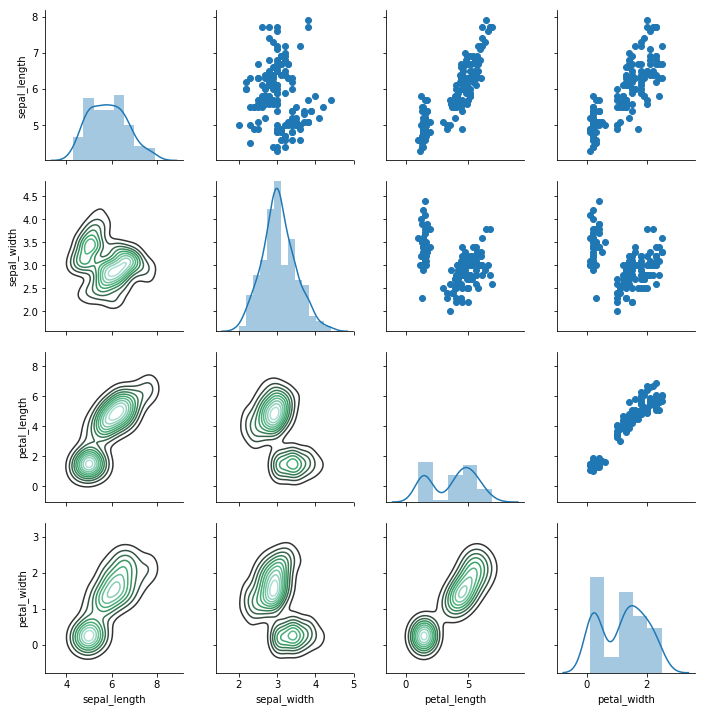

In [67]:
ir = sns.PairGrid(iris)
ir.map_upper(plt.scatter)
ir.map_lower(sns.kdeplot)
ir.map_diag(sns.distplot)

**PairGrid** provides more control over the plot than **PairPlot**

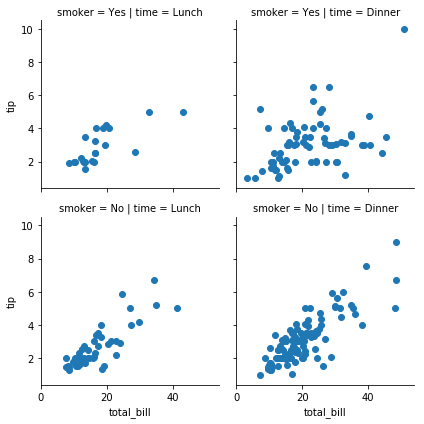

In [71]:
ttp = sns.FacetGrid(data = tips, row = 'smoker', col= 'time')
ttp.map(plt.scatter, 'total_bill', 'tip')

Notice the titles of the plots. They are differentiated on basis of row and column label.

## Styling

**set_style** allows to customize the background as per the readability.

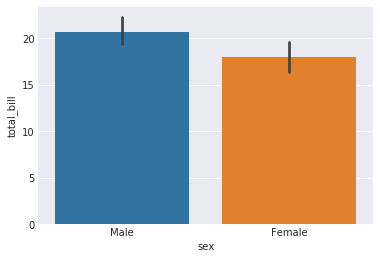

In [73]:
sns.set_style(style = 'darkgrid')
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

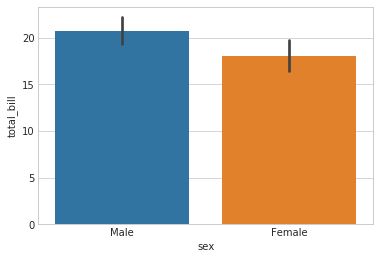

In [74]:
sns.set_style(style = 'whitegrid')
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

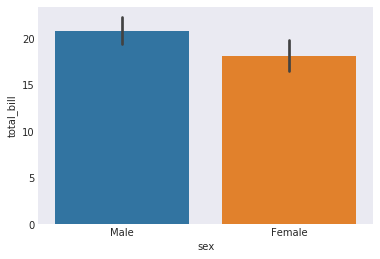

In [89]:
sns.set_style(style = 'dark')
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

**despine** allows to remove the side axes.

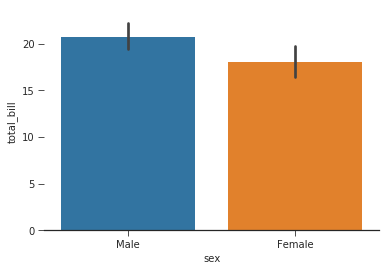

In [88]:
sns.set_style(style = 'ticks')
sns.barplot(x = 'sex', y = 'total_bill', data = tips)
sns.despine(top = True, right = True, left = True, bottom = False)

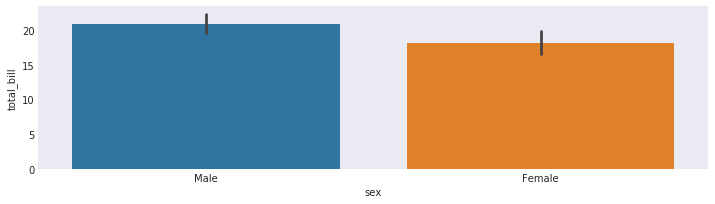

In [92]:
plt.figure(figsize = (12,3))
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

**plt.figure** here overrides the seaborn size as seaborn call back matplotlib.

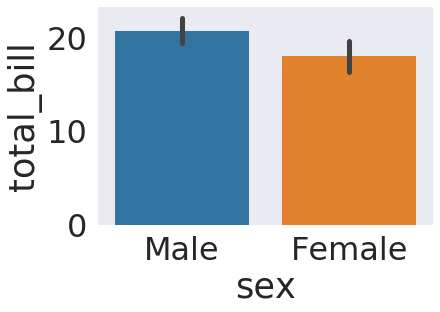

In [96]:
sns.set_context(context = 'poster', font_scale = 2)
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

**context** by default is set to **notebook**.

* for choosing the color palette schemes checkout the link
https://matplotlib.org/examples/color/colormaps_reference.html

### Finally!